In [1]:

from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

/Users/shivamkumargiri/Desktop/Final Year Project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
TRAIN_DIR = 'images3/train'
TEST_DIR = 'images3/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [5]:
print(train)

                                image    label
0        images3/train/happy/1409.jpg    happy
1        images3/train/happy/1435.jpg    happy
2        images3/train/happy/1421.jpg    happy
3         images3/train/happy/162.jpg    happy
4        images3/train/happy/1151.jpg    happy
...                               ...      ...
2340  images3/train/disgust/10112.jpg  disgust
2341  images3/train/disgust/21668.jpg  disgust
2342   images3/train/disgust/7049.jpg  disgust
2343   images3/train/disgust/9716.jpg  disgust
2344   images3/train/disgust/3561.jpg  disgust

[2345 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [7]:
print(test)
print(test['image'])

                              image    label
0        images3/test/happy/942.jpg    happy
1        images3/test/happy/639.jpg    happy
2         images3/test/happy/62.jpg    happy
3        images3/test/happy/613.jpg    happy
4       images3/test/happy/1152.jpg    happy
..                              ...      ...
995  images3/test/disgust/20761.jpg  disgust
996  images3/test/disgust/28710.jpg  disgust
997  images3/test/disgust/23876.jpg  disgust
998   images3/test/disgust/9460.jpg  disgust
999  images3/test/disgust/35580.jpg  disgust

[1000 rows x 2 columns]
0          images3/test/happy/942.jpg
1          images3/test/happy/639.jpg
2           images3/test/happy/62.jpg
3          images3/test/happy/613.jpg
4         images3/test/happy/1152.jpg
                    ...              
995    images3/test/disgust/20761.jpg
996    images3/test/disgust/28710.jpg
997    images3/test/disgust/23876.jpg
998     images3/test/disgust/9460.jpg
999    images3/test/disgust/35580.jpg
Name: image, Leng

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images3):
    features = []
    for image in tqdm(images3):
        img = load_img(image, color_mode="grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/2345 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
from keras.utils import plot_model

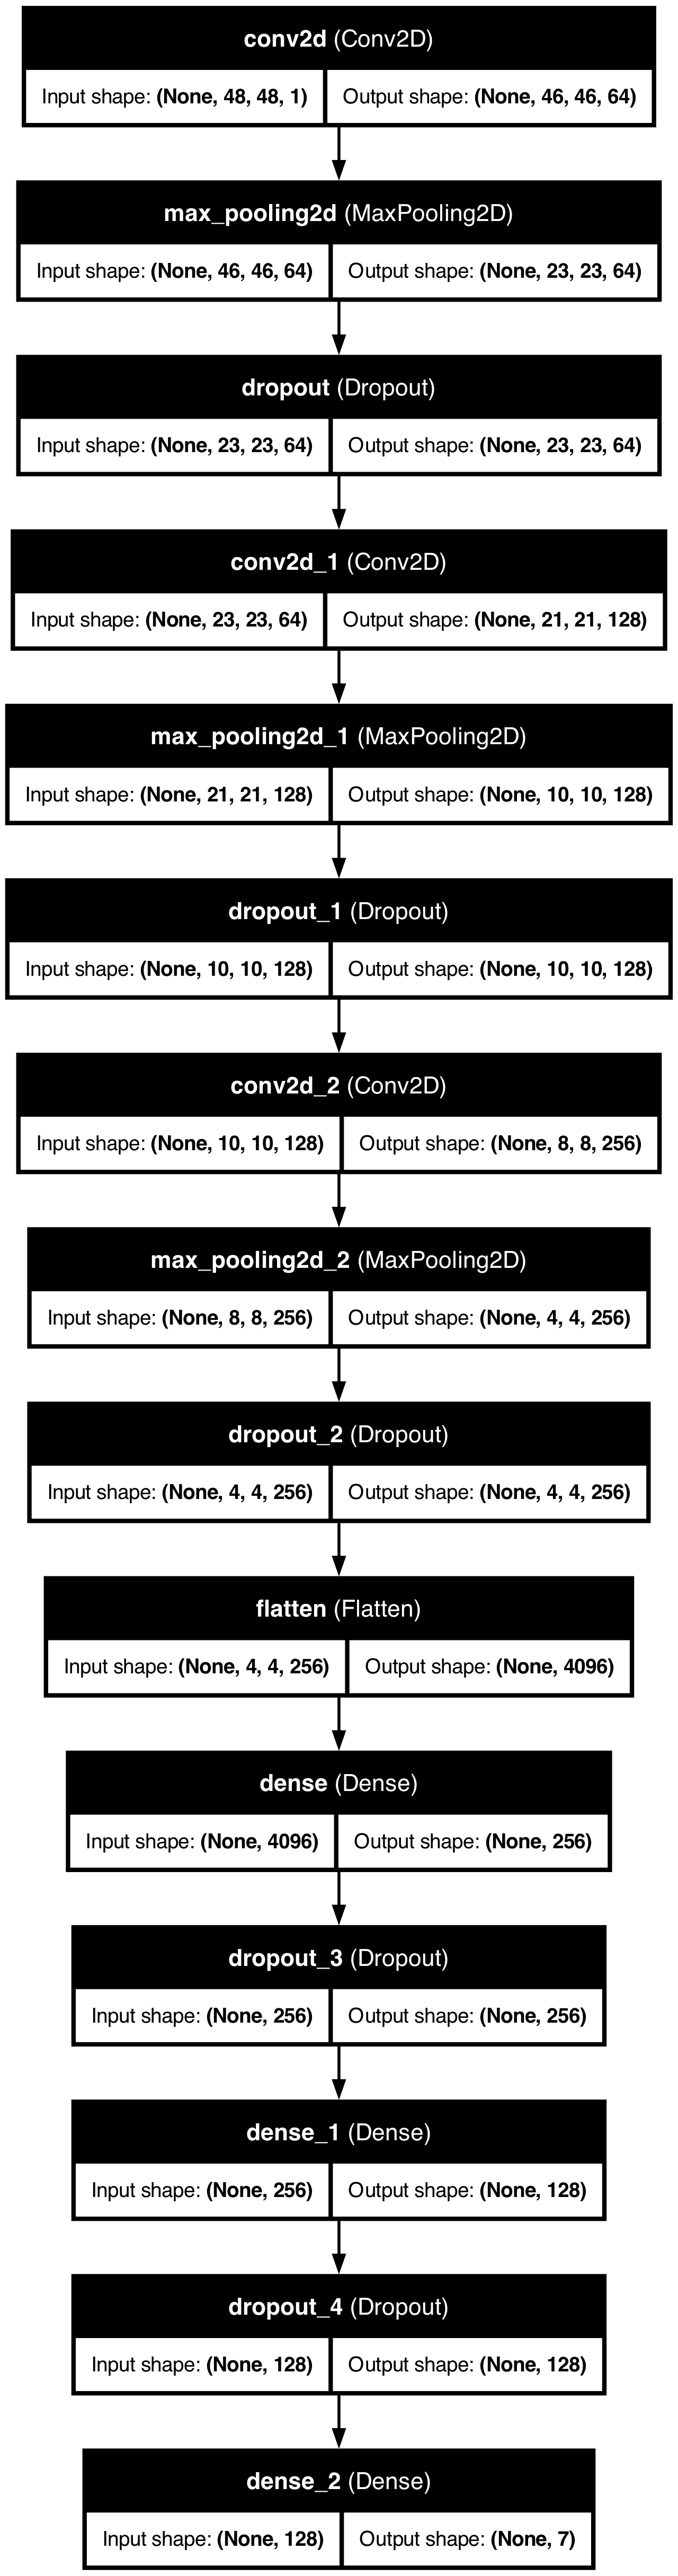

In [18]:
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Matplotlib is building the font cache; this may take a moment.


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.1292 - loss: 1.9552 - val_accuracy: 0.1500 - val_loss: 1.9458
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.1485 - loss: 1.9455 - val_accuracy: 0.1500 - val_loss: 1.9459
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.1467 - loss: 1.9459 - val_accuracy: 0.1400 - val_loss: 1.9460
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.1546 - loss: 1.9441 - val_accuracy: 0.1520 - val_loss: 1.9467
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.1745 - loss: 1.9433 - val_accuracy: 0.1930 - val_loss: 1.9237
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.1821 - loss: 1.9210 - val_accuracy: 0.2500 - val_loss: 1.8374
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.2425 - loss: 1.8628 - val_accuracy: 0.2740 - val_loss: 1.8090
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.2762 - loss: 1.7994 - val_accu

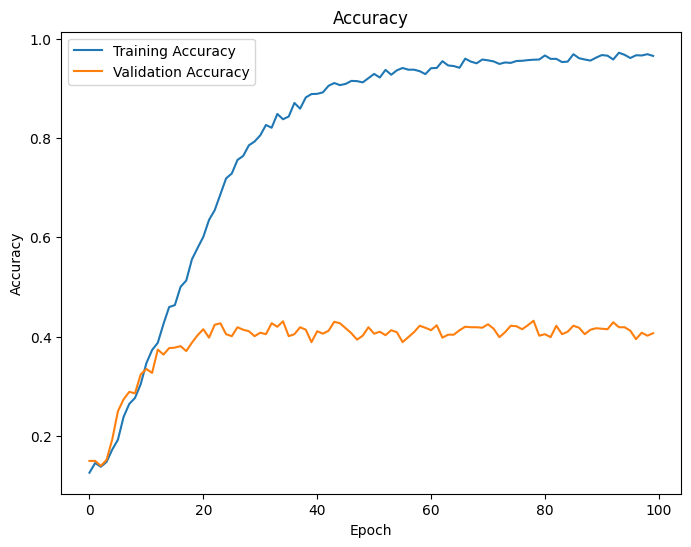

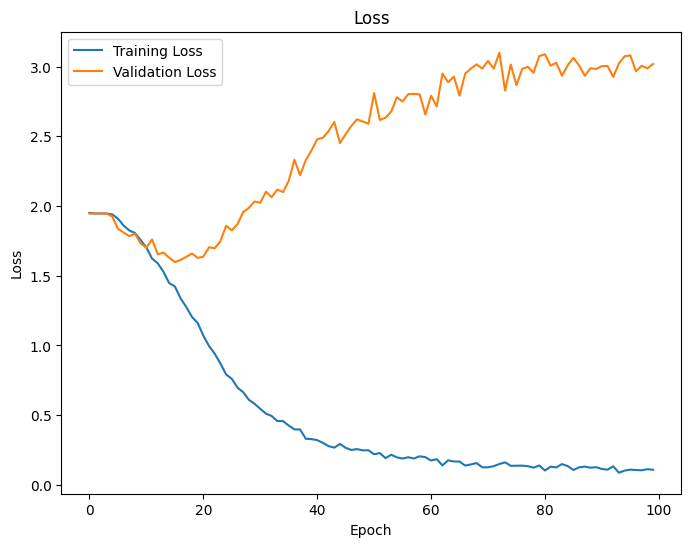

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you've trained your model and stored the history
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

# Extract the accuracy and loss values from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


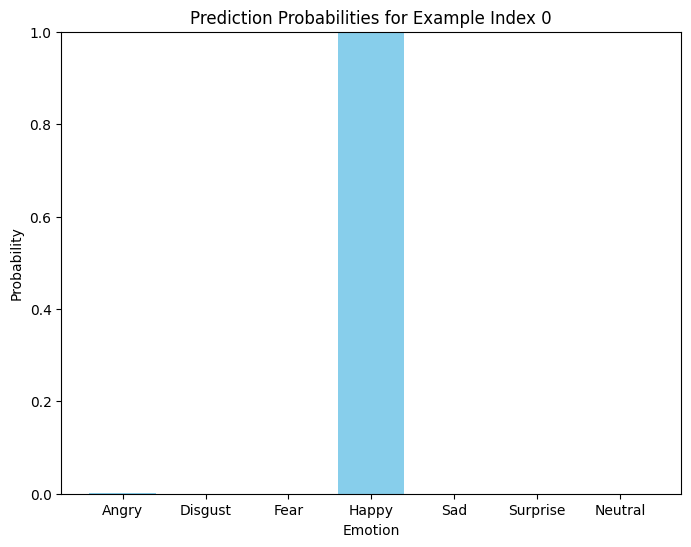

In [23]:
# Plot prediction probabilities (Emotion vs. Probability)
# Assuming the number of classes in your model matches the length of predictions[0]
# Update `class_labels` to match the number of classes in your model
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Update this list

predictions = model.predict(x_test)  # Get predicted probabilities
example_index = 0  # Index of the example you want to visualize
predicted_probabilities = predictions[example_index]

# Check that the length of `class_labels` matches the shape of `predicted_probabilities`
assert len(class_labels) == len(predicted_probabilities), (
    "Number of class labels does not match the number of predicted probabilities"
)

plt.figure(figsize=(8, 6))
plt.bar(class_labels, predicted_probabilities, color='skyblue')
plt.title('Prediction Probabilities for Example Index {}'.format(example_index))
plt.xlabel('Emotion')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.show()


<Figure size 800x600 with 0 Axes>

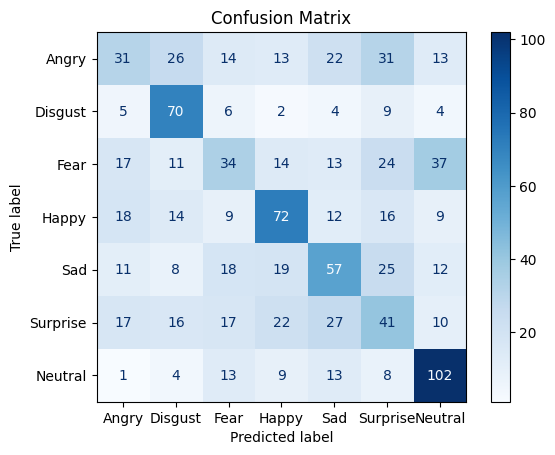

In [24]:
y_pred = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_test, axis=1)  # True class indices (assuming one-hot encoding)

cm = confusion_matrix(y_true, y_pred, labels=range(len(class_labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [25]:
model_json = model.to_json()
with open("emotiondetector2.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model in Keras's native format
model.save("emotiondetector2.keras")


In [26]:
from keras.models import model_from_json

In [27]:
json_file = open("emotiondetector2.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector2.keras")

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def ef(image):
    img = load_img(image, color_mode="grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [32]:
image = 'images3/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
model prediction is  sad


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  fear


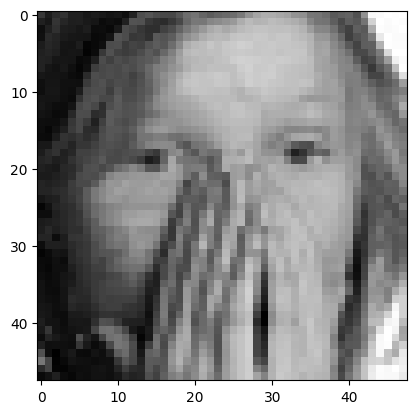

In [35]:
image = 'images3/train/fear/45.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  disgust


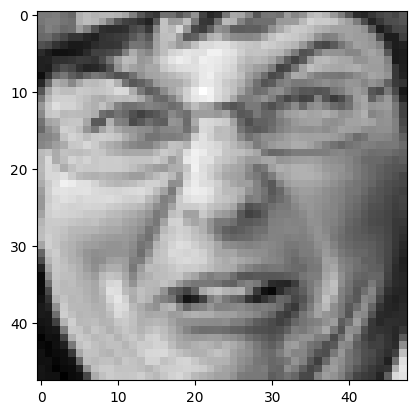

In [36]:
image = 'images3/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  happy


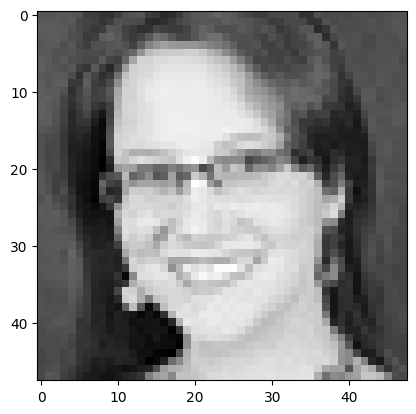

In [37]:
image = 'images3/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  surprise


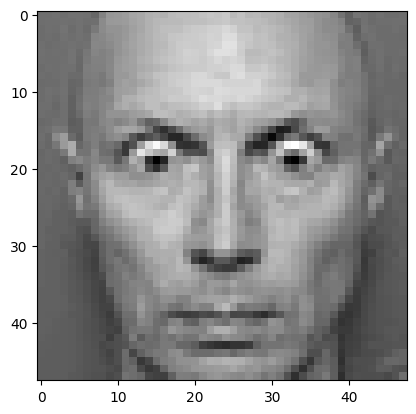

In [38]:
image = 'images3/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  angry


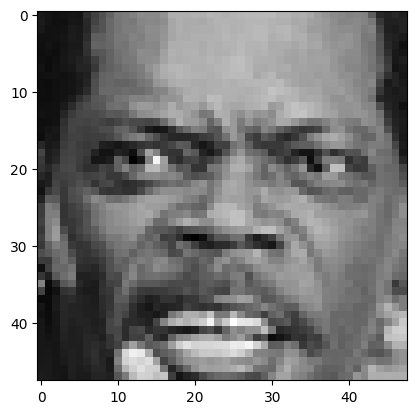

In [39]:
image = 'images3/train/angry/10.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  surprise


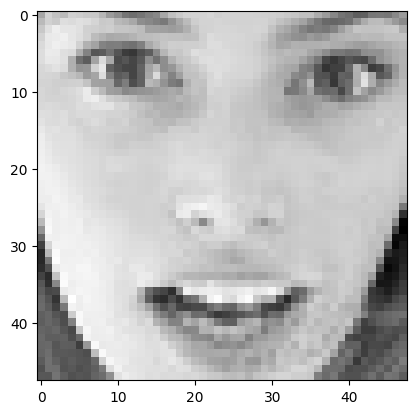

In [40]:
image = 'images3/train/surprise/26.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  sad


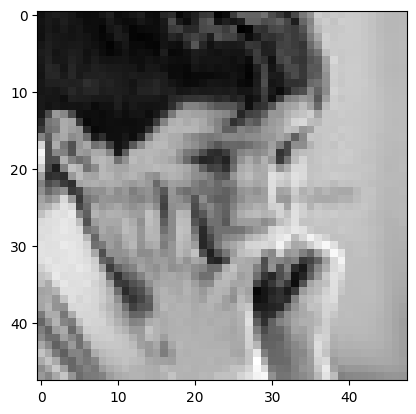

In [41]:
image = 'images3/train/sad/3.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  sad


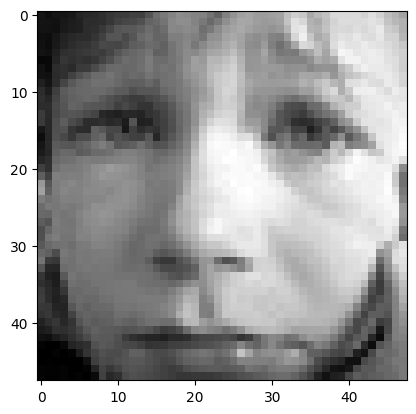

In [42]:
image = 'images3/train/sad/6.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
model prediction is  disgust


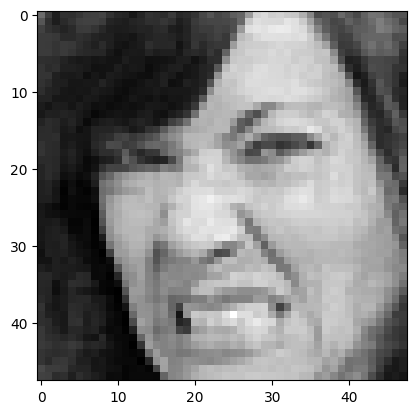

In [43]:
image = 'images3/train/disgust/388.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  neutral


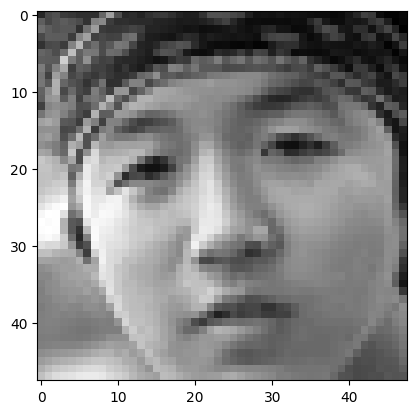

In [44]:
image = 'images3/train/neutral/11.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')